In [1]:
import cv2
import os
import numpy as np
from PIL import Image
from random import shuffle
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.base import clone
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [12]:
Map = {'1': 0, '2':1, '5':2, '10':3, '20':4, '50':5, '100':6, '200':7, '500':8, '1000':9}
notes = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
IMG_SIZE = 100
n_classes = 10
training_data = []
validation_data = []
testing_data = []

In [13]:
def create_train_data():
    DIR = "TK4/Training/"
    for tki in range(0,10):
        DIR2 = DIR + str(notes[tki])
        
        sl = 0;
        for img in tqdm(os.listdir(DIR2)):
            label = tki
            #print(label)
            path = os.path.join(DIR2, img)
            #img = cv2.imread(path)
            #img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = Image.open(path)
            img = img.resize((IMG_SIZE, IMG_SIZE))
            training_data.append([np.array(img), label])
            sl = sl+1
          #  if sl==612:
           #     break
            
  
    shuffle(training_data)

In [14]:
training_set = create_train_data()

100%|███████████████████████████████████████████████████████████████████████████████| 900/900 [00:06<00:00, 136.11it/s]


Sample data: 


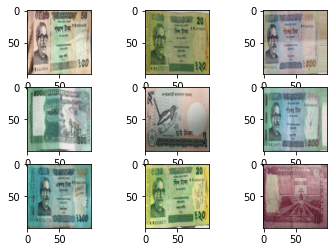

In [15]:
print("Sample data: ")
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(training_data[i][0])
plt.show()

In [16]:
for i in range(9):
  print(notes[training_data[i][1]], end=' ')

50 20 500 500 2 500 100 20 10 

In [17]:
X = np.array([i[0] for i in training_data])
Y = np.array([i[1] for i in training_data])
from sklearn.model_selection import train_test_split
X1, X2, Y1, Y2 = train_test_split(X, Y, test_size = 0.25, random_state=42, stratify=Y)
#X3, X4, Y3, Y4 = train_test_split(X2, Y2, test_size = 0.50, random_state=42, stratify=Y)

train_x = X1
train_y = Y1
val_x = X2
val_y = Y2
#test_x = X4
#test_y = Y4

print(Y1)

print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)
#print(test_y.shape)


train_len = train_y.shape[0]
val_len = val_y.shape[0]
#test_len = test_y.shape[0]
print(train_len)

[3 2 1 ... 0 3 8]
(6750, 100, 100, 3)
(6750,)
(2250, 100, 100, 3)
(2250,)
6750


In [ ]:
########## Decision Tree ##########

In [40]:
from sklearn.tree import DecisionTreeRegressor
tree_clf = DecisionTreeRegressor(max_depth=2)

In [41]:
train_x = train_x.reshape(train_len,IMG_SIZE*IMG_SIZE*3)
val_x = val_x.reshape(val_len, IMG_SIZE*IMG_SIZE*3)
tree_clf.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=2)

In [42]:
y_test_pred = tree_clf.predict(val_x)
n_corrections = sum(y_test_pred==val_y)
print("Number of correct predictions: ", n_corrections)
print("Accuracy on test set: ", n_corrections/len(y_test_pred)*100)

Number of correct predictions:  0
Accuracy on test set:  0.0


In [14]:
y_train_pred = cross_val_predict(svm_clf, train_x, train_y, cv=3)

C:\Users\SAIFUZZAMAN SAIF\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\SAIFUZZAMAN SAIF\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\SAIFUZZAMAN SAIF\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [16]:
confusion_matrix(train_y, y_train_pred)

array([[673,   0,   1,   0,   0,   0,   0,   0,   1,   0],
       [  0, 670,   1,   0,   0,   2,   1,   0,   1,   0],
       [  0,   0, 662,   2,   2,   1,   1,   3,   4,   0],
       [  0,   0,   1, 672,   0,   1,   0,   1,   0,   0],
       [  0,   1,   6,   0, 660,   1,   2,   1,   2,   2],
       [  1,   1,   2,   1,   2, 667,   1,   0,   0,   0],
       [  0,   0,   0,   1,   0,   2, 670,   0,   2,   0],
       [  1,   0,   0,   0,   0,   0,   0, 673,   1,   0],
       [  1,   4,   2,   0,   2,   1,  13,   2, 646,   4],
       [  0,   1,   0,   1,   0,   0,   1,   0,   0, 672]], dtype=int64)

In [ ]:
########## Randome Forest ##############

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [22]:
rand_clf = RandomForestClassifier()
rand_clf.fit(train_x, train_y)

RandomForestClassifier()

In [23]:
y_test_pred = rand_clf.predict(val_x)
n_corrections = sum(y_test_pred==val_y)
print("Number of correct predictions: ", n_corrections)
print("Accuracy on test set: ", n_corrections/len(y_test_pred)*100)

Number of correct predictions:  2212
Accuracy on test set:  98.31111111111112


In [24]:
y_test_pred = cross_val_predict(rand_clf, val_x, val_y, cv=3)

In [25]:
confusion_matrix(val_y, y_test_pred)

array([[212,   5,   1,   0,   0,   4,   0,   2,   1,   0],
       [  4, 212,   6,   0,   1,   1,   0,   0,   0,   1],
       [  0,   6, 210,   2,   3,   1,   0,   2,   0,   1],
       [  4,   0,   0, 221,   0,   0,   0,   0,   0,   0],
       [  0,   3,   1,   0, 214,   2,   1,   0,   3,   1],
       [  1,   1,   3,   1,   1, 209,   2,   4,   1,   2],
       [  0,   0,   0,   0,   0,   1, 213,   2,   9,   0],
       [  0,   2,   1,   0,   0,   3,   0, 219,   0,   0],
       [  4,   1,   7,   2,   0,   8,   7,   1, 188,   7],
       [  0,   0,   2,   3,   0,   3,   2,   0,   4, 211]], dtype=int64)

In [ ]:
############ K nearest neighbors #########

In [26]:
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=3)

In [27]:
y_test_pred = clf_knn.predict(val_x)
n_corrections = sum(y_test_pred==val_y)
print("Number of correct predictions: ", n_corrections)
print("Accuracy on test set: ", n_corrections/len(y_test_pred)*100)

Number of correct predictions:  2231
Accuracy on test set:  99.15555555555555


In [29]:
y_test_pred = cross_val_predict(clf_knn, val_x, val_y, cv=3)

In [30]:
confusion_matrix(val_y, y_test_pred)

array([[219,   3,   0,   0,   0,   3,   0,   0,   0,   0],
       [  0, 221,   1,   0,   0,   2,   0,   0,   1,   0],
       [  0,   5, 215,   0,   3,   0,   1,   0,   0,   1],
       [  0,   0,   1, 224,   0,   0,   0,   0,   0,   0],
       [  0,   3,   6,   2, 213,   1,   0,   0,   0,   0],
       [  1,   0,   1,   2,   0, 217,   0,   0,   0,   4],
       [  0,   0,   0,   0,   0,   5, 214,   0,   3,   3],
       [  0,   0,   1,   0,   0,   2,   0, 222,   0,   0],
       [  4,   0,   3,   1,   1,  19,   1,   0, 184,  12],
       [  0,   1,   0,   1,   0,   4,   0,   0,   1, 218]], dtype=int64)

In [31]:
from sklearn import linear_model
lr = linear_model.LogisticRegression()
lr.fit(train_x, train_y)

C:\Users\SAIFUZZAMAN SAIF\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_test_pred = lr.predict(val_x)
n_corrections = sum(y_test_pred==val_y)
print("Number of correct predictions: ", n_corrections)
print("Accuracy on test set: ", n_corrections/len(y_test_pred)*100)

Number of correct predictions:  2232
Accuracy on test set:  99.2


In [33]:
y_test_pred = cross_val_predict(lr, val_x, val_y, cv=3)

C:\Users\SAIFUZZAMAN SAIF\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SAIFUZZAMAN SAIF\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [34]:
confusion_matrix(val_y, y_test_pred)

array([[220,   1,   3,   0,   0,   0,   0,   1,   0,   0],
       [  0, 220,   1,   0,   1,   1,   0,   0,   2,   0],
       [  1,   0, 217,   1,   1,   1,   1,   0,   2,   1],
       [  1,   0,   0, 224,   0,   0,   0,   0,   0,   0],
       [  0,   1,   1,   0, 216,   1,   2,   0,   4,   0],
       [  1,   0,   2,   0,   2, 215,   0,   1,   2,   2],
       [  0,   0,   0,   0,   2,   2, 218,   0,   3,   0],
       [  0,   1,   0,   0,   0,   0,   0, 217,   7,   0],
       [  1,   1,   2,   1,   2,   2,   8,   4, 202,   2],
       [  0,   0,   0,   1,   0,   4,   0,   1,   1, 218]], dtype=int64)

In [35]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_x, train_y)

SGDClassifier(random_state=42)

In [36]:
y_test_pred = sgd_clf.predict(val_x)
n_corrections = sum(y_test_pred==val_y)
print("Number of correct predictions: ", n_corrections)
print("Accuracy on test set: ", n_corrections/len(y_test_pred)*100)

Number of correct predictions:  2234
Accuracy on test set:  99.28888888888889


In [37]:
y_test_pred = cross_val_predict(sgd_clf, val_x, val_y, cv=3)

In [38]:
confusion_matrix(val_y, y_test_pred)

array([[221,   2,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0, 218,   0,   0,   1,   1,   0,   0,   5,   0],
       [  0,   2, 206,   0,   1,   4,   0,   0,  11,   1],
       [  0,   0,   1, 223,   0,   0,   0,   0,   1,   0],
       [  0,   1,   1,   0, 216,   0,   0,   0,   7,   0],
       [  0,   0,   2,   0,   1, 213,   0,   0,   9,   0],
       [  0,   0,   0,   0,   1,   0, 215,   0,   9,   0],
       [  0,   0,   0,   0,   0,   0,   0, 211,  13,   1],
       [  1,   1,   2,   1,   7,   1,   7,   1, 203,   1],
       [  0,   0,   0,   1,   0,   2,   0,   0,  10, 212]], dtype=int64)